In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 4 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.17 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.


In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |        

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r '/content/gdrive/MyDrive/nucleus' "/content/darknet/data"

In [ ]:
!./darknet detector test ../gdrive/MyDrive/nucleus/nucleus.data ../gdrive/MyDrive/nucleus/nucleus.cfg ../gdrive/MyDrive/nucleus/nucleus_final.weights ../gdrive/MyDrive/images/slice_00000_z=0.1321um.jpg 

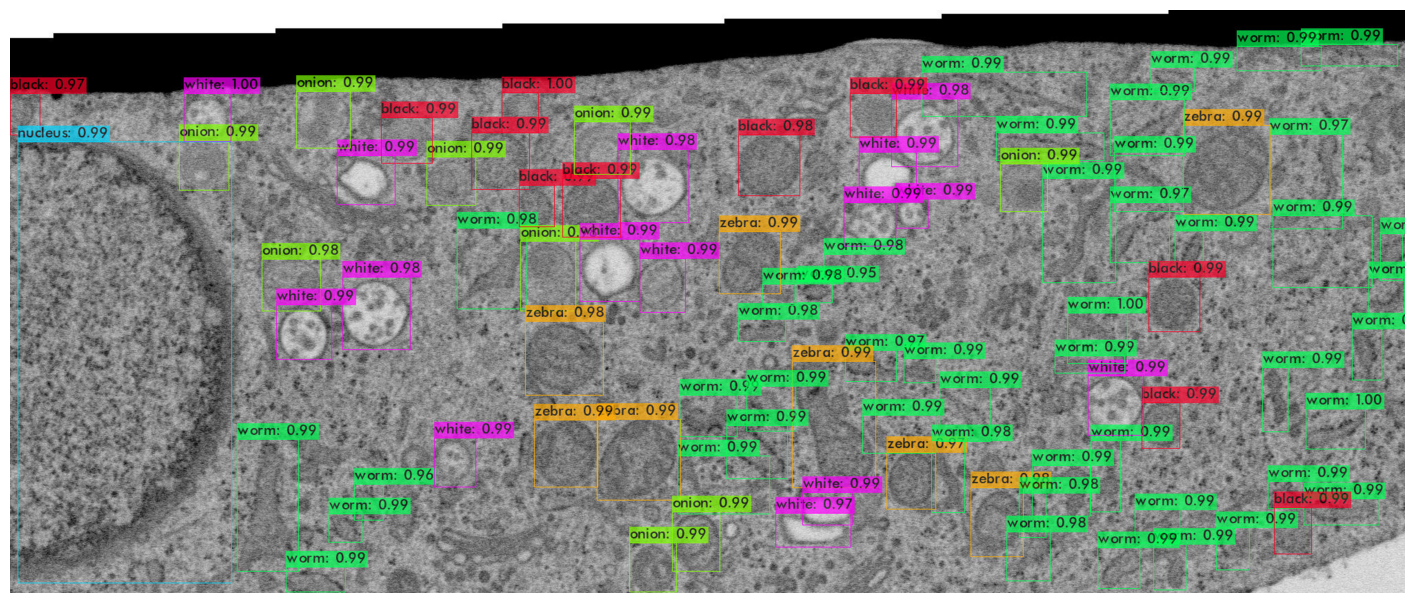

In [ ]:
# !cp predictions.jpg ../images_detected/detection1.jpg
# !dir

imShow('predictions.jpg')

In [40]:
import os

images = os.listdir("../gdrive/MyDrive/images/")
new_file = ""
for i in images:
  new_file += "../gdrive/MyDrive/images/"+i+"\n"
with open("images.txt", "w") as f:
  f.write(new_file)

# for i in images:


In [41]:
!./darknet detector test ../gdrive/MyDrive/nucleus/nucleus.data ../gdrive/MyDrive/nucleus/nucleus.cfg ../gdrive/MyDrive/nucleus/nucleus_final.weights -ext_output -dont_show -out result.json < images.txt

Streaming output truncated to the last 5000 lines.
worm: 88%	(left_x: 1175   top_y:  101   width:   77   height:   37)
worm: 79%	(left_x: 1181   top_y:  365   width:   54   height:   35)
zebra: 86%	(left_x: 1203   top_y:  421   width:  123   height:  135)
black: 62%	(left_x: 1212   top_y:  604   width:   63   height:   66)
worm: 80%	(left_x: 1216   top_y:  195   width:   65   height:   35)
worm: 63%	(left_x: 1225   top_y:  332   width:  112   height:   48)
worm: 81%	(left_x: 1240   top_y:  769   width:   81   height:   50)
worm: 89%	(left_x: 1262   top_y:  108   width:   36   height:   28)
zebra: 89%	(left_x: 1288   top_y:  114   width:   93   height:   91)
worm: 76%	(left_x: 1309   top_y:  545   width:   84   height:   47)
worm: 81%	(left_x: 1311   top_y:  249   width:   42   height:   61)
worm: 77%	(left_x: 1337   top_y:  466   width:   62   height:   71)
black: 87%	(left_x: 1340   top_y:  351   width:   66   height:   71)
worm: 84%	(left_x: 1383   top_y:  103   width:   89   height: